## Problem Defination:
####   

### Selected Dataset:  
Graduate Admissions  
https://www.kaggle.com/mohansacharya/graduate-admissions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

Finding null values

In [3]:
np.sum(df.isnull())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

No null items found.  
Column name has to be renamed to remove extra scape

In [4]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


There is no string or null data.  
Data types are int64 and float64.  
Memory usage: 35.2 KB  

### Data Exploration

Not Having Research: 220
Having Research: 280


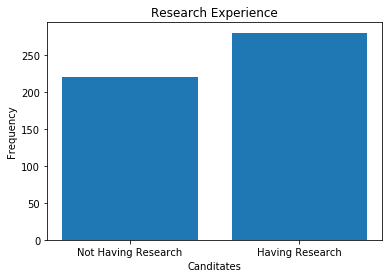

In [7]:
print("Not Having Research:",len(df[df.Research == 0]))
print("Having Research:",len(df[df.Research == 1]))
y = np.array([len(df[df.Research == 0]),len(df[df.Research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

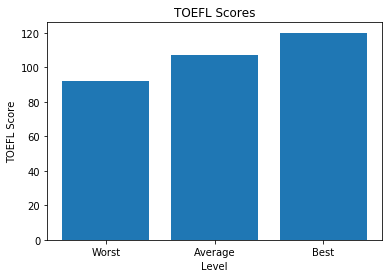

In [8]:
y_toefl = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
plt.bar(["Worst","Average","Best"],y_toefl)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

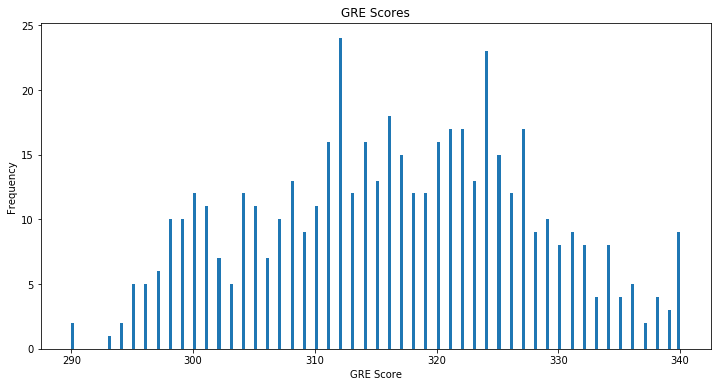

In [9]:
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (12,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

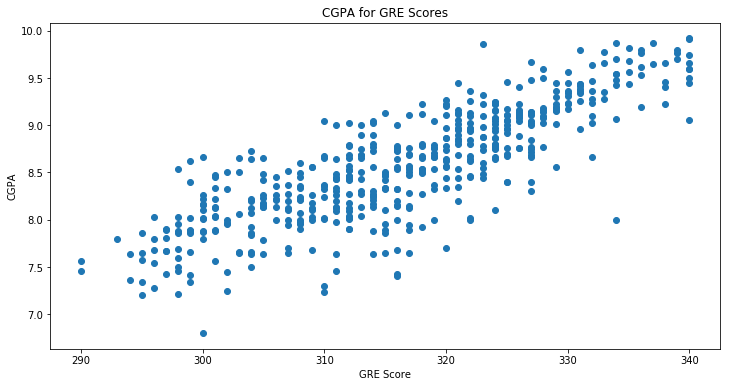

In [10]:
plt.figure(figsize = (12,6))
plt.scatter(df["GRE Score"],df.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

Candidates with high GRE scores usually have a high CGPA score.

### Justification of Data Mining Task Chosen:  
### Justification of Algorithm Chosen:  

### Data pre-processing

In [11]:
serialNo=df['Serial No.']
df =df.drop(['Serial No.'], axis=1)

In [12]:
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"],axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1));
x_train = scalerX.fit_transform(x_train);
x_test = scalerX.transform(x_test);
y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]
y_train_01 = np.array(y_train_01);
y_test_01 = np.array(y_test_01);

/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='lbfgs')
lrc.fit(x_train,y_train_01)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print("Precision Score: ", precision_score(y_test_01,lrc.predict(x_test)));
print("Recall Score: ", recall_score(y_test_01,lrc.predict(x_test)));
print("F1 Score: ",f1_score(y_test_01,lrc.predict(x_test)));
print("Confusion Matrix:")
print(confusion_matrix(y_test_01,lrc.predict(x_test)))

Precision Score:  0.9285714285714286
Recall Score:  0.9629629629629629
F1 Score:  0.9454545454545454
Confusion Matrix:
[[71  2]
 [ 1 26]]


In [16]:
pd.DataFrame({'Real':y_test_01,'Prediction':lrc.predict(x_test)}).to_csv('Results.csv', index=False)

## Data Visualization of Results